# US-Ignite Fed_Notebook

# Data from 2009-2016

In [4]:
#import libraries from Carto.
from cartoframes.auth import set_default_credentials
from cartoframes.viz import Map, Layer
import cartoframes
cartoframes.__version__
#from cartoframes.viz.helpers import color_continuous_layer
import pandas as pd
import geopandas as gpd
import requests
import json
from autocensus import Query #Library from Socrata to gather ACS Data
from cartoframes.data.services import Geocoding
#import censusdata
#set_default_credentials('creds_usignite.json')
set_default_credentials(
    base_url='https://usignite-admin.carto.com/',
    api_key='81c922dc336bd82103d92a768816a4567c444909'
)

from cartoframes.data.observatory import Catalog, Variable, Geography, Dataset

In [5]:
import numpy as np

from linearmodels import PanelOLS
from linearmodels import RandomEffects
import ipywidgets as widgets
from ipywidgets import Output, Tab
from IPython.display import clear_output
from cartoframes.data.services import Isolines
from cartoframes.data.observatory import Variable
from cartoframes.data.observatory import Enrichment
from cartoframes.data.observatory import Catalog

# EDA

In [6]:
import seaborn as sns

In [7]:
df_final=pd.read_csv("~/Downloads/Final_merged_city.csv")

In [8]:
df_final.head(100)

,Unnamed: 0,geo_id,centroid,year,geometry,total_tran,pop,edut,collegemale,collegefemale,...,ratio_65,ratio_22_50,diffEmployment_year,diffEstablish_year,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio
0,0,6073015502,POINT (-116.8304254797509 32.81131603277056),2010,MULTIPOLYGON (((-116.8583888559341 32.81723278...,1194.0,2433.0,1651.0,130.0,107.0,...,0.345664,0.058775,-1.350294,-0.017613,0.000000,0.000000,0.000000,0.917085,0.000000,0.044389
1,1,6073015502,POINT (-116.8304254797509 32.81131603277056),2011,MULTIPOLYGON (((-116.8583888559341 32.81723278...,1229.0,2496.0,1717.0,124.0,114.0,...,0.332131,0.079327,5.401174,0.516634,0.000000,0.000000,0.000000,0.926770,0.000000,0.038242
2,2,6073015502,POINT (-116.8304254797509 32.81131603277056),2012,MULTIPOLYGON (((-116.8583888559341 32.81723278...,1297.0,2529.0,1790.0,124.0,107.0,...,0.345987,0.086200,-5.988258,-0.023483,0.000000,0.000000,0.000000,0.925212,0.000000,0.032382
3,3,6073015502,POINT (-116.8304254797509 32.81131603277056),2013,MULTIPOLYGON (((-116.8583888559341 32.81723278...,1226.0,2698.0,1900.0,141.0,148.0,...,0.320979,0.143810,5.518591,0.023483,0.000000,0.000000,0.000000,0.933931,0.000000,0.029364
4,4,6073015502,POINT (-116.8304645225708 32.81130364624261),2014,MULTIPOLYGON (((-116.8583888559341 32.81723278...,1239.0,2699.0,1865.0,143.0,135.0,...,0.309003,0.115969,1.409002,-0.011742,0.000000,0.000000,0.000000,0.934625,0.000000,0.005650
5,5,6073015502,POINT (-116.830446134218 32.81131662191954),2015,MULTIPOLYGON (((-116.8583888559341 32.81723278...,1365.0,2909.0,2005.0,126.0,152.0,...,0.314197,0.114816,-1.878669,0.011742,0.000000,0.000000,0.000000,0.931868,0.000000,0.005128
6,6,6073015502,POINT (-116.8299969494062 32.81020076184434),2016,MULTIPOLYGON (((-116.8583888559341 32.81723278...,1331.0,2849.0,2017.0,108.0,151.0,...,0.316602,0.151281,14.559687,0.035225,0.000000,0.000000,0.000000,0.894065,0.000000,0.005259
7,7,6073015502,POINT (-116.8300017429104 32.81048542676395),2017,MULTIPOLYGON (((-116.8583888559341 32.81723278...,1322.0,2902.0,2072.0,135.0,162.0,...,0.310820,0.155065,-632.745245,-33.312888,0.000000,0.000000,0.000000,0.891831,0.000000,0.003026
8,8,6073021202,POINT (-116.641978140868 32.8284525792826),2010,MULTIPOLYGON (((-116.7511618358752 32.79765279...,1172.0,2828.0,1930.0,86.0,43.0,...,0.368105,0.050919,-64.814090,-0.845401,0.000000,0.000000,0.000000,0.931741,0.000000,0.010239
9,9,6073021202,POINT (-116.641978140868 32.8284525792826),2011,MULTIPOLYGON (((-116.7511618358752 32.79765279...,1265.0,3164.0,1991.0,87.0,94.0,...,0.343552,0.086283,259.256360,24.798434,0.000000,0.000000,0.000000,0.905138,0.000000,0.008696


In [9]:
df_final.columns

Index(['Unnamed: 0', 'geo_id', 'centroid', 'year', 'geometry', 'total_tran',
       'pop', 'edut', 'collegemale', 'collegefemale', 'households', 'income',
       'gini', 'zipcode', 'EmploymentS', 'EstablishmentS', 'ratio_65',
       'ratio_22_50', 'diffEmployment_year', 'diffEstablish_year', 'bus_ratio',
       'bus_ratio_total', 'public_ratio', 'car_ratio', 'bicy_ratio',
       'walked_ratio'],
      dtype='object')

In [10]:
data=df_final[['zipcode', 'geo_id', 'year', 'edut',
       'collegemale', 'collegefemale','pop',
     'households', 'income', 'gini',  'EmploymentS', 'EstablishmentS','ratio_65','ratio_22_50','diffEmployment_year', 'diffEstablish_year','bus_ratio', 'bus_ratio_total',
       'public_ratio', 'car_ratio', 'bicy_ratio', 'walked_ratio']]

In [12]:
##get the total amount of population who attend college
data['total_college']=data['collegemale']+data['collegefemale']

##get the ratio of college attending by total education population
data['college_ratio']=data['total_college']/data['edut']

##get the ratio of college attending by total population
data['college_ratio_pop']=data['total_college']/data['pop']

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

In [13]:
data['EstablishmentS'].describe() 

count    7896.000000
mean       68.831548
std       147.831421
min         0.000000
25%         3.529081
50%        20.630991
75%        69.889266
max      1682.911376
Name: EstablishmentS, dtype: float64

In [14]:
data['EmploymentS'].describe() 

count     7896.000000
mean      1346.698271
std       3608.322707
min          0.000000
25%         58.577551
50%        361.894331
75%       1224.784588
max      50304.527929
Name: EmploymentS, dtype: float64

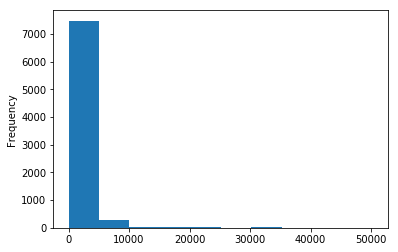

In [15]:
data['EmploymentS'].plot(kind ="hist")

In [16]:
data['EstablishmentS'].describe() 

count    7896.000000
mean       68.831548
std       147.831421
min         0.000000
25%         3.529081
50%        20.630991
75%        69.889266
max      1682.911376
Name: EstablishmentS, dtype: float64

In [18]:
data['logEstablishmentS']=np.log(data['EstablishmentS'])

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [19]:
loges=np.log(data['EstablishmentS'])

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [20]:
data['gini'].describe() 

count    7896.000000
mean        0.405519
std         0.072611
min         0.000000
25%         0.368600
50%         0.405000
75%         0.445400
max         0.722600
Name: gini, dtype: float64

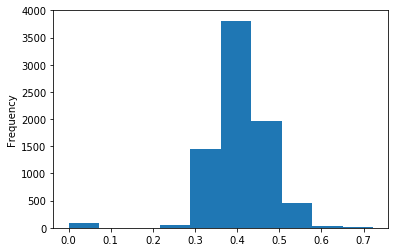

In [21]:
data['gini'].plot(kind ="hist") 

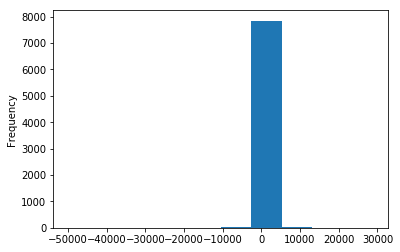

In [22]:
data['diffEmployment_year'].plot(kind ="hist")

In [23]:
corr=data.corr().abs()

#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
#to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]


[Text(0.5, 0, 'zipcode'),
 Text(1.5, 0, 'geo_id'),
 Text(2.5, 0, 'year'),
 Text(3.5, 0, 'edut'),
 Text(4.5, 0, 'collegemale'),
 Text(5.5, 0, 'collegefemale'),
 Text(6.5, 0, 'pop'),
 Text(7.5, 0, 'households'),
 Text(8.5, 0, 'income'),
 Text(9.5, 0, 'gini'),
 Text(10.5, 0, 'EmploymentS'),
 Text(11.5, 0, 'EstablishmentS'),
 Text(12.5, 0, 'ratio_65'),
 Text(13.5, 0, 'ratio_22_50'),
 Text(14.5, 0, 'diffEmployment_year'),
 Text(15.5, 0, 'diffEstablish_year'),
 Text(16.5, 0, 'bus_ratio'),
 Text(17.5, 0, 'bus_ratio_total'),
 Text(18.5, 0, 'public_ratio'),
 Text(19.5, 0, 'car_ratio'),
 Text(20.5, 0, 'bicy_ratio'),
 Text(21.5, 0, 'walked_ratio'),
 Text(22.5, 0, 'total_college'),
 Text(23.5, 0, 'college_ratio'),
 Text(24.5, 0, 'college_ratio_pop'),
 Text(25.5, 0, 'logEstablishmentS')]

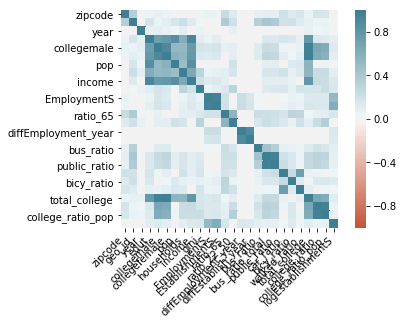

In [24]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

# modeling 

In [25]:
df=data

In [26]:
df.columns

Index(['zipcode', 'geo_id', 'year', 'edut', 'collegemale', 'collegefemale',
       'pop', 'households', 'income', 'gini', 'EmploymentS', 'EstablishmentS',
       'ratio_65', 'ratio_22_50', 'diffEmployment_year', 'diffEstablish_year',
       'bus_ratio', 'bus_ratio_total', 'public_ratio', 'car_ratio',
       'bicy_ratio', 'walked_ratio', 'total_college', 'college_ratio',
       'college_ratio_pop', 'logEstablishmentS'],
      dtype='object')

In [27]:
df.head()

,zipcode,geo_id,year,edut,collegemale,collegefemale,pop,households,income,gini,...,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio,total_college,college_ratio,college_ratio_pop,logEstablishmentS
0,91901,6073015502,2010,1651.0,130.0,107.0,2433.0,83.0,864.0,0.4400,...,0.0,0.0,0.0,0.917085,0.0,0.044389,237.0,0.143549,0.097411,0.851204
1,91901,6073015502,2011,1717.0,124.0,114.0,2496.0,95.0,896.0,0.4080,...,0.0,0.0,0.0,0.926770,0.0,0.038242,238.0,0.138614,0.095353,0.858695
2,91901,6073015502,2012,1790.0,124.0,107.0,2529.0,113.0,904.0,0.3790,...,0.0,0.0,0.0,0.925212,0.0,0.032382,231.0,0.129050,0.091340,0.611636
3,91901,6073015502,2013,1900.0,141.0,148.0,2698.0,136.0,903.0,0.3782,...,0.0,0.0,0.0,0.933931,0.0,0.029364,289.0,0.152105,0.107116,0.624294
4,91901,6073015502,2014,1865.0,143.0,135.0,2699.0,154.0,883.0,0.3837,...,0.0,0.0,0.0,0.934625,0.0,0.005650,278.0,0.149062,0.103001,0.611636


In [28]:
from linearmodels.panel import PooledOLS
import statsmodels.api as sm

In [29]:
df['year'] = pd.to_datetime(df['year'], format='%Y')

In [30]:
df['year']=df['year'].dt.year

In [31]:
#add column year to index
df=df.set_index([ 'zipcode','year'])
#swap indexes




In [32]:
import statsmodels.formula.api as smf

In [33]:
df.columns

Index(['geo_id', 'edut', 'collegemale', 'collegefemale', 'pop', 'households',
       'income', 'gini', 'EmploymentS', 'EstablishmentS', 'ratio_65',
       'ratio_22_50', 'diffEmployment_year', 'diffEstablish_year', 'bus_ratio',
       'bus_ratio_total', 'public_ratio', 'car_ratio', 'bicy_ratio',
       'walked_ratio', 'total_college', 'college_ratio', 'college_ratio_pop',
       'logEstablishmentS'],
      dtype='object')

# modeling

dependent variables(outputs):
1. EmploymentS : the size of employment  of all industries in corresponding us census tract and  year

2. EstablishmentS: the size of establishment of all industries in corresponding us census tract and  year
p.s.: currently, I predicted establishment size(EstablishmentS) first and we can predict employment size(EmploymentS) later using similar methods in this file


use all the varaibles to predict establishment size 
1. pop: the total population of the corresponding census tract(not prediction)
2. households: households of the corresponding census tract
3. Income: income of the corresponding census tract
4. edit: total education population of the corresponding census tract
5. Total_college: total college population of the corresponding census tract
6. College_ratio: total college ratio
7. Ratio_65: the ratio of the population who are older than 65
8. Ration_22_50: the ratio of the population who are from 22 to 50
9. diffEmployment_year: the difference of employee size from last year at same census tract
10. diffEstablish_year: the difference of establishment size from last year at the same census tract
11. college_ratio_pop: the ratio of college attendance by the total population
12. bus_ratio: the ratio of bus usage by total public transportation
13. bus_ratio_total: the ratio of bus usage by total transportation(including private and public transportation)
14. public_ratio: the ratio of public transportation by total transportation
15. car_ratio: the ratio of car usage by total transportation
16. bicy_ratio: the ratio of bicycle usage by total transportation
17. walked_ratio: ration of people who walked to work by total transportation usage
18. gini: Gini index of the corresponding census tract



In [34]:
FE_ols1 = smf.ols(formula= 'EstablishmentS ~ 1 +pop+gini+households+income+edut+total_college+college_ratio+ratio_65+ratio_22_50+diffEmployment_year+diffEstablish_year+college_ratio_pop+bus_ratio+bus_ratio_total+public_ratio+car_ratio+bicy_ratio+walked_ratio', data = df).fit()
print(FE_ols1.summary())

                            OLS Regression Results                            
Dep. Variable:         EstablishmentS   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     74.82
Date:                Mon, 06 Apr 2020   Prob (F-statistic):          3.60e-253
Time:                        15:43:49   Log-Likelihood:                -49933.
No. Observations:                7880   AIC:                         9.990e+04
Df Residuals:                    7861   BIC:                         1.000e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -163.8130    

In [35]:
FE_ols2 = smf.ols(formula= 'EstablishmentS ~ 1 +pop+gini+income+edut+total_college+ratio_65+diffEmployment_year+diffEstablish_year+bus_ratio+bus_ratio_total+public_ratio+walked_ratio', data = df).fit()
print(FE_ols2.summary())

                            OLS Regression Results                            
Dep. Variable:         EstablishmentS   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     110.2
Date:                Mon, 06 Apr 2020   Prob (F-statistic):          2.05e-254
Time:                        15:44:17   Log-Likelihood:                -50040.
No. Observations:                7896   AIC:                         1.001e+05
Df Residuals:                    7883   BIC:                         1.002e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -115.4015    

In [ ]:
#+households

In [36]:
import numpy as np
import pandas as pd
import libpysal as ps
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import compare_surfaces, truncate_colormap
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl

In [37]:
df.columns

Index(['geo_id', 'edut', 'collegemale', 'collegefemale', 'pop', 'households',
       'income', 'gini', 'EmploymentS', 'EstablishmentS', 'ratio_65',
       'ratio_22_50', 'diffEmployment_year', 'diffEstablish_year', 'bus_ratio',
       'bus_ratio_total', 'public_ratio', 'car_ratio', 'bicy_ratio',
       'walked_ratio', 'total_college', 'college_ratio', 'college_ratio_pop',
       'logEstablishmentS'],
      dtype='object')

In [38]:

#year = pd.Categorical(year)

In [39]:
df.dropna(inplace=True)

In [40]:

exog_vars = ['pop','gini','income','edut','ratio_65','diffEmployment_year', 'diffEstablish_year',
            'bus_ratio','public_ratio','walked_ratio']
exog = sm.add_constant(df[exog_vars])

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [41]:
df.isnull().values.any()
df.isnull().sum()
df=df.dropna()

In [46]:
from linearmodels.panel import RandomEffects
mod = RandomEffects(df.EstablishmentS , exog)


In [47]:
re_res = mod.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:         EstablishmentS   R-squared:                        0.1236
Estimator:              RandomEffects   R-squared (Between):              0.0863
No. Observations:                7880   R-squared (Within):               0.1190
Date:                Mon, Apr 06 2020   R-squared (Overall):              0.1322
Time:                        15:45:16   Log-likelihood                -4.951e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      110.93
Entities:                         102   P-value                           0.0000
Avg Obs:                       77.255   Distribution:                 F(10,7869)
Min Obs:                       8.0000                                           
Max Obs:                       192.00   F-statistic (robust):             108.21
                            

In [49]:

exog_vars1 =['pop','gini','income','ratio_65','diffEmployment_year', 'diffEstablish_year',
            'bus_ratio','public_ratio','walked_ratio']
exog1 = sm.add_constant(df[exog_vars1])

In [50]:
FE_olsfinal =  smf.ols(formula= 'EstablishmentS  ~ 1 +pop+gini+income+edut+total_college+ratio_65+diffEmployment_year+ diffEstablish_year+bus_ratio+bus_ratio_total+public_ratio+walked_ratio', data = df).fit()
print(FE_ols2.summary())

                            OLS Regression Results                            
Dep. Variable:         EstablishmentS   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     110.2
Date:                Mon, 06 Apr 2020   Prob (F-statistic):          2.05e-254
Time:                        15:46:04   Log-Likelihood:                -50040.
No. Observations:                7896   AIC:                         1.001e+05
Df Residuals:                    7883   BIC:                         1.002e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -115.4015    

In [52]:
mod2 = PanelOLS(df.EstablishmentS, exog1, entity_effects=True, time_effects=True)
fe_te_res = mod2.fit()
print(fe_te_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:         EstablishmentS   R-squared:                        0.1192
Estimator:                   PanelOLS   R-squared (Between):              0.0257
No. Observations:                7880   R-squared (Within):               0.1194
Date:                Mon, Apr 06 2020   R-squared (Overall):              0.1287
Time:                        15:46:17   Log-likelihood                -4.935e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      116.72
Entities:                         102   P-value                           0.0000
Avg Obs:                       77.255   Distribution:                  F(9,7762)
Min Obs:                       8.0000                                           
Max Obs:                       192.00   F-statistic (robust):             116.72
                            

In [53]:
from linearmodels.panel import compare
print(compare({'RE':re_res,'Pooled':fe_te_res}))

                       Model Comparison                      
                                        RE             Pooled
-------------------------------------------------------------
Dep. Variable               EstablishmentS     EstablishmentS
Estimator                    RandomEffects           PanelOLS
No. Observations                      7880               7880
Cov. Est.                       Unadjusted         Unadjusted
R-squared                           0.1236             0.1192
R-Squared (Within)                  0.1190             0.1194
R-Squared (Between)                 0.0863             0.0257
R-Squared (Overall)                 0.1322             0.1287
F-statistic                         110.93             116.72
P-value (F-stat)                    0.0000             0.0000
=====================     ================   ================
const                              -134.73            -149.68
                                 (-9.3682)          (-10.700)
pop     

In [54]:
import libpysal as ps
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import compare_surfaces, truncate_colormap
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl

In [55]:
df_final=df_final.dropna()

In [56]:
df_final['EstablishmentS'][df_final['EstablishmentS']!=0.0].sort_values()
df_final['total_college']=df_final['collegemale']+df_final['collegefemale']
df_final['college_ratio']=df_final['total_college']/df_final['edut']

In [57]:
from shapely import wkt

df_final['geometry'] = df_final['geometry'].apply(wkt.loads)
df_final['centroid'] = df_final['centroid'].apply(wkt.loads)

In [58]:
dfshp = gp.GeoDataFrame(df_final, geometry='geometry')

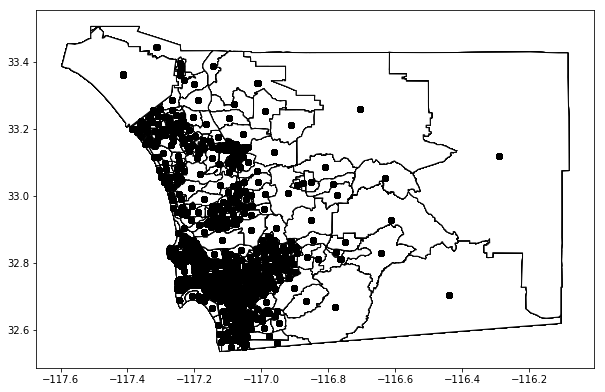

In [59]:

fig, ax = plt.subplots(figsize = (10, 10))
dfshp.plot(ax=ax, **{'edgecolor': 'black', 'facecolor': 'white'})
dfshp.centroid.plot(ax = ax, c = 'black')
plt.savefig('sd_shp')
plt.show()

In [60]:
dfshp.head()

,Unnamed: 0,geo_id,centroid,year,geometry,total_tran,pop,edut,collegemale,collegefemale,...,diffEmployment_year,diffEstablish_year,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio,total_college,college_ratio
0,0,6073015502,POINT (-116.8304254797509 32.81131603277056),2010,"MULTIPOLYGON (((-116.85839 32.81723, -116.8547...",1194.0,2433.0,1651.0,130.0,107.0,...,-1.350294,-0.017613,0.0,0.0,0.0,0.917085,0.0,0.044389,237.0,0.143549
1,1,6073015502,POINT (-116.8304254797509 32.81131603277056),2011,"MULTIPOLYGON (((-116.85839 32.81723, -116.8547...",1229.0,2496.0,1717.0,124.0,114.0,...,5.401174,0.516634,0.0,0.0,0.0,0.926770,0.0,0.038242,238.0,0.138614
2,2,6073015502,POINT (-116.8304254797509 32.81131603277056),2012,"MULTIPOLYGON (((-116.85839 32.81723, -116.8547...",1297.0,2529.0,1790.0,124.0,107.0,...,-5.988258,-0.023483,0.0,0.0,0.0,0.925212,0.0,0.032382,231.0,0.129050
3,3,6073015502,POINT (-116.8304254797509 32.81131603277056),2013,"MULTIPOLYGON (((-116.85839 32.81723, -116.8547...",1226.0,2698.0,1900.0,141.0,148.0,...,5.518591,0.023483,0.0,0.0,0.0,0.933931,0.0,0.029364,289.0,0.152105
4,4,6073015502,POINT (-116.8304645225708 32.81130364624261),2014,"MULTIPOLYGON (((-116.85839 32.81723, -116.8547...",1239.0,2699.0,1865.0,143.0,135.0,...,1.409002,-0.011742,0.0,0.0,0.0,0.934625,0.0,0.005650,278.0,0.149062


In [61]:
g_y=dfshp['EstablishmentS'].values.reshape((-1, 1))

In [62]:
g_X =dfshp[['pop','gini','income','edut','ratio_65','diffEmployment_year', 'diffEstablish_year',
            'bus_ratio','public_ratio','walked_ratio']].values

In [63]:
def getXY(pt):
    return (pt.x, pt.y)
x,y = [list(t) for t in zip(*map(getXY, dfshp['centroid']))]

In [64]:
g_coords = g_coords = list(zip(x, y))

In [65]:
gwr_selector = Sel_BW(g_coords, g_y, g_X)

In [66]:
gwr_bw = gwr_selector.search()

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/spglm/iwls.py:37: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.209253e-18
  xtx_inv_xt = linalg.solve(xtx, xT)
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/spglm/iwls.py:37: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.496829e-18
  xtx_inv_xt = linalg.solve(xtx, xT)
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/spglm/iwls.py:37: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.623598e-18
  xtx_inv_xt = linalg.solve(xtx, xT)
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/spglm/iwls.py:37: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.515110e-18
  xtx

In [67]:
gwr_model = GWR(g_coords, g_y, g_X, gwr_bw)

In [68]:
gwr_results = gwr_model.fit()

In [69]:
print(gwr_results.resid_ss)

47247019.49887987


In [70]:
bws = (x for x in range(25, 175, 25))

In [71]:
print(gwr_results.aic)
print(gwr_results.aicc)
print(gwr_results.R2)

93541.74555742064
93997.72358942968
0.726165111797853


In [72]:
len(dfshp)

7896

In [73]:
s=abs(gwr_results.localR2)

In [74]:
gwr_results.localR2

array([[0.79530622],
       [0.79530622],
       [0.79530622],
       ...,
       [0.07471489],
       [0.07471595],
       [0.07471536]])

In [75]:
dfshp['R2'] =gwr_results.localR2

In [76]:
dfshp['R2']=abs(dfshp['R2'])

In [77]:
dfshp2=dfshp[dfshp['R2']<=1]

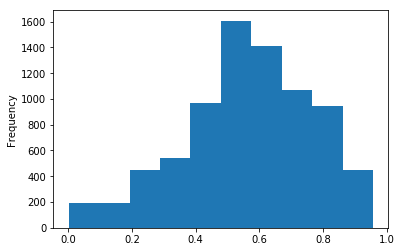

In [78]:
dfshp2['R2'].plot(kind ="hist")

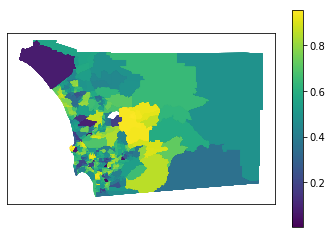

In [79]:
#Local model fit
#dfshp2['R2'] =abs(gwr_results.localR2)
dfshp2.plot('R2', legend = True)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig('local_R2')
plt.show()